#**Introduction**

I have been provided a HR dataset that contanins Gender(Male or Female), Business(person has Business or Not),	Dependancies(People dependent on person or Not),	Calls(Authority to make call or Not), Type(Salary satatement type),	Billing(Subscribed for billing or Not)	Rating(It has been given rating or not),	Age	Salary,	Base_pay,	Bonus	Unit_Price,	Volume,	openingbalance,	closingbalance,	low,	Unit_Sales,	Total_Sales, Months and Education features. I am going to apply Data cleaning to clean the data, Exploratory Data Analysis for visulaization of dataset, Feature Engineering for converting categorical feature and Model creation for create, fit and predict data.



#**Data Preprocessing**

##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
from sklearn import metrics

##Import Dataset

In [2]:
df = pd.read_csv('New_data_Set.csv')
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Gender,Female,Female,Male,Female,Male,Male,Male,Female,Female,Male
Business,0,0,0,1,0,0,0,0,1,0
Dependancies,No,No,No,No,No,No,Yes,No,No,No
Calls,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
Type,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Two year,Two year,One year,Month-to-month,Month-to-month
Billing,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Rating,Yes,Yes,No,Yes,Yes,No,No,No,Yes,No
Age,18,19,22,21,23,23,23,24,24,43
Salary,5089,5698.12,5896.65,6125.12,6245,6444.23,6455.5,6458.36,6529.23,6682.33
Base_pay,2035.6,2279.25,2358.66,2450.05,2498,2577.69,2582.2,2583.34,2611.69,2672.93


##check shape of dataset



In [3]:
df.shape

(5000, 20)

In given dataset there are 5000 rows and 20 columns

##Information of dataset



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

Here we check information of dataset such data types and NaN values

##Describe the dataset




In [5]:
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


describe() describes min, max, mean, count, etc values of individual continous feature.

##Print Column names



In [6]:
df.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales',
       'Months', 'Education'],
      dtype='object')

 show all the columns name of the given dataset

##Check NaN value



In [7]:
df.isna().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

By checking nan value we found that few features have nan value scuh as Base_pay has 23 nan value, openingbalance has 1476 nan value and Total_Sales has 8 nan value

##Convert Total_Sales string into numeric form



In [8]:
df["Total_Sales"] = pd.to_numeric(df["Total_Sales"] ,errors='coerce')

In given dataset, Total_Sales feature is string datatype so, for filing nan value first convert it into numneric for or int datatype

##Fill nan value

For filling all nan value first check the types of the skewed distribution.

##Fill Base_Pay Feature

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Base_pay', ylabel='Density'>

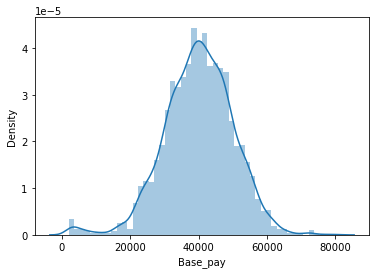

In [9]:
sns.distplot(df.Base_pay)

In [10]:
df['Base_pay']=df['Base_pay'].fillna(df['Base_pay'].mean())

From above graph, i found that it is bell curved shaped.("The bell curve is perfectly symmetrical. It is concentrated around the peak and decreases on either side."). In this case mean, median and more are same, so the mean is often the preferred.

##Fill Total_Sales feature

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Sales', ylabel='Density'>

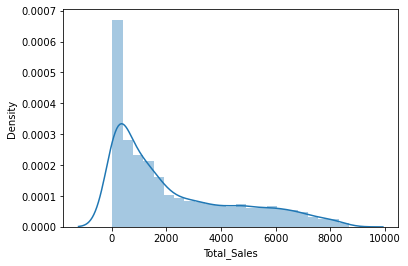

In [11]:
sns.distplot(df.Total_Sales)

In [12]:
df['Total_Sales']=df['Total_Sales'].fillna(df['Total_Sales'].median())

From the above graph I found that it is the right skewed distribution.("A right-skewed distribution has a long right tail and also called positive skeweness.  That’s because there is a long tail in the positive direction on the number line."). In this case the median is usually preferred because, the median is more resistant to outliers than the mean and mode.

##Fill openingbalance feature

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='openingbalance', ylabel='Density'>

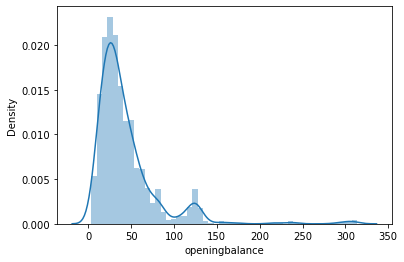

In [13]:
sns.distplot(df.openingbalance)

In [14]:
df['openingbalance']=df['openingbalance'].fillna(df['openingbalance'].median())

From the above graph I found that it is the right skewed distribution.("A right-skewed distribution has a long right tail and also called positive skeweness. That’s because there is a long tail in the positive direction on the number line."). In this case the median is usually preferred because, the median is more resistant to outliers than the mean and mode.

##After fill nan value check again nan value



In [15]:
df.isna().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

After fill all nan value again check or confirm that there are no more nan value present in dataset.

#**Exploratory Data Analysis**


In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be boring, and/or overwhelming to derive insights by looking at plain numbers. 

##Gender Feature




Male      2528
Female    2472
Name: Gender, dtype: int64



<ipython-input-16-380653963712>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-16-380653963712>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()


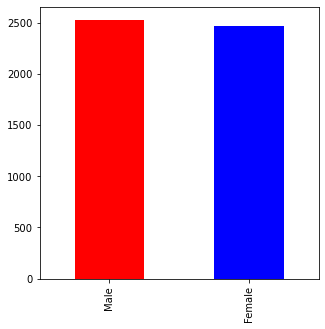

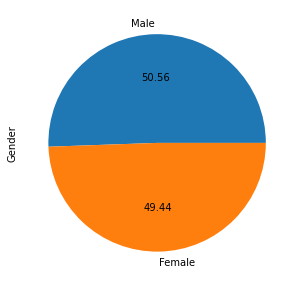

In [16]:
print(df.Gender.value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Gender'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
f1 = plt.figure(figsize = (5,5))
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

First count the categories of Gender feature i.e 2528 or 50.56%  **"Male"** values and 2472 or 49.44%  **"Female"** values. Then plot a graph in numerical bar and pie chart.

##Business Feature




0    4200
1     800
Name: Business, dtype: int64
0 = NoN Business
1 = Business


<ipython-input-17-14fca052cfc4>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-17-14fca052cfc4>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()


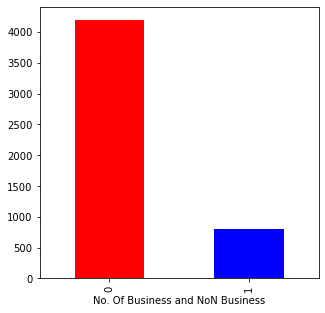

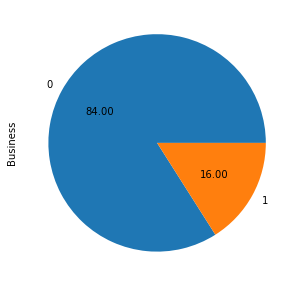

In [17]:
print(df["Business"].value_counts())
f = plt.figure(figsize = (5,5))
df['Business'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
print("0 = NoN Business")
print("1 = Business")
plt.xlabel("No. Of Business and NoN Business")
f1 = plt.figure(figsize = (5,5))
df['Business'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

First count the categories value Business feature i.e 4200 or 84% contains 0 values which means **"Non-Business" Man** and 800 or 16% contains 1 which means **"Business Man"**.Then plot a garph numerical bar and pie chart

##Dependancies Feature




No     3524
Yes    1476
Name: Dependancies, dtype: int64



<ipython-input-18-4f09eabd1f6e>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-18-4f09eabd1f6e>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()


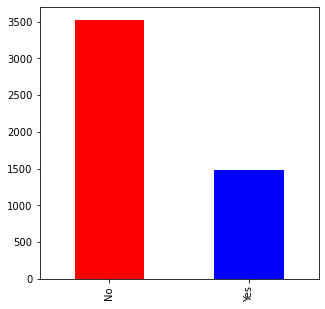

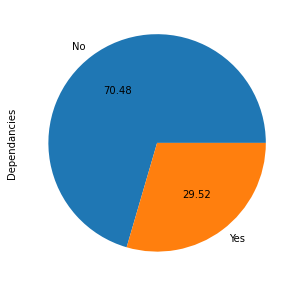

In [18]:
print(df.Dependancies.value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Dependancies'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
f1 = plt.figure(figsize = (5,5))
df['Dependancies'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

First count the categories of Dependancies feature i.e 3524 or 70.48% No values which means **"No people dependent on the person"** and 1476 or 29.52% Yes values which means **"people dependent on the person"**. Then plot a graph in numerical bar and pie chart.

##Calls Feature




Yes    4539
No      461
Name: Calls, dtype: int64

NoneNone


<ipython-input-19-dd810e9d4ea7>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  print(f.show(),end = "")
<ipython-input-19-dd810e9d4ea7>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  print(f1.show())


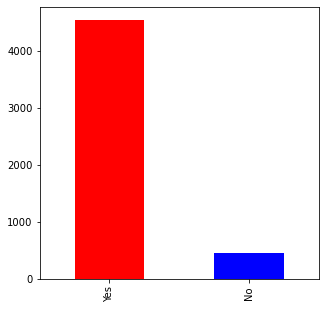

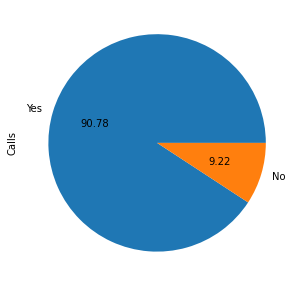

In [19]:
print(df.Calls.value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Calls'].value_counts().plot(kind="bar",color=["red","blue"])
f1 = plt.figure(figsize = (5,5))
df['Calls'].value_counts().plot(kind="pie", autopct="%.2f")
print(f.show(),end = "")
print(f1.show())

First count the categories of Calls feature i.e 4539 or 90.78% Yes values which means **"Person has authority to make call"** and 461 or 9.22% No values which means **"Person has no authority to make call"**. Then plot a graph in numerical bar and pie chart.

##Type Feature




Month-to-month    2777
Two year          1195
One year          1028
Name: Type, dtype: int64



<ipython-input-20-65fb43bd4ddd>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-20-65fb43bd4ddd>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()


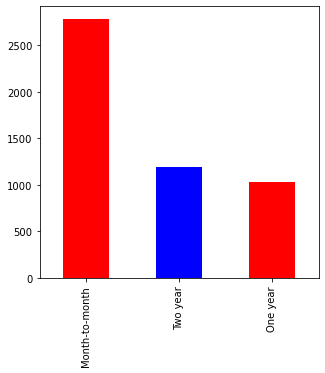

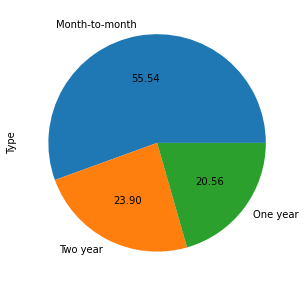

In [20]:
print(df.Type.value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Type'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
f1 = plt.figure(figsize = (5,5))
df['Type'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

First count the categories of Type(**"Salary settlement type"**) feature i.e 2777 or 55.54% **"Month-to-month"** values and 1195 or 23.90% **"Two year"** values and 1028 or 20.56% **"One year"** values. Then plot a graph in numerical bar and pie chart.

##Billing Feature




Yes    2956
No     2044
Name: Billing, dtype: int64



<ipython-input-21-56c3d02c633b>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-21-56c3d02c633b>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()


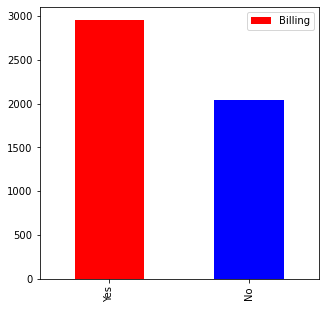

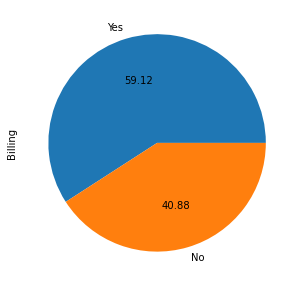

In [21]:
print(df['Billing'].value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Billing'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
plt.legend(loc='best')
f1 = plt.figure(figsize = (5,5))
df['Billing'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

First count the categories of Billing feature i.e 2956 or 59.12% Yes values which means **"Subscribed to plans**" and 2044 or 40.88% No values which means **"No Subscribed to plans"**. Then plot a graph in numerical bar and pie chart.

##Rating Feature




No     3682
Yes    1318
Name: Rating, dtype: int64



<ipython-input-22-18d6f8de27e0>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-22-18d6f8de27e0>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()


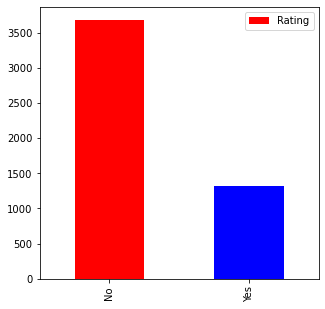

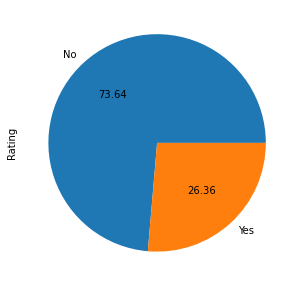

In [22]:
print(df['Rating'].value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Rating'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
plt.legend(loc='best')
f1 = plt.figure(figsize = (5,5))
df['Rating'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

First count the categories of Rating feature i.e 3682 or 73.64% No values which means **"No Rating by a Superior"** and 1318 or 26.36% Yes values which means **"Rating by a Superior"**. Then plot a graph in numerical bar and pie chart.

##Education Feature




PG                     2979
Graduation             1980
Intermediate             27
High School or less      14
Name: Education, dtype: int64



<ipython-input-23-8774890c3d05>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-23-8774890c3d05>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()


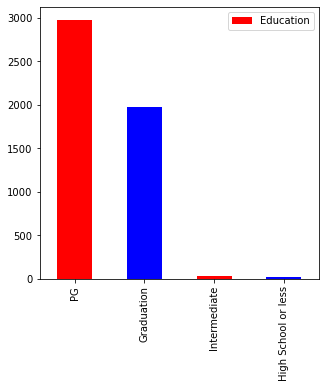

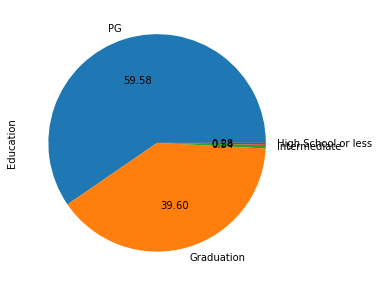

In [23]:
print(df['Education'].value_counts())
print()
f = plt.figure(figsize = (5,5))
df['Education'].value_counts().plot(kind="bar",color=["red","blue"])
f.show()
plt.legend(loc='best')
f1 = plt.figure(figsize = (5,5))
df['Education'].value_counts().plot(kind="pie", autopct="%.2f")
f1.show()

First count the categories of Education feature i.e 2979 or 59.58% **"PG Education"** values and 1980 or 39.60% **"Graduation Education"** values and 27 or 0.54% **"Intermediate Education"** values and 14 or 0.286% **"High School Education"** values. Then plot a graph in numerical bar and pie chart.

##Continous value features




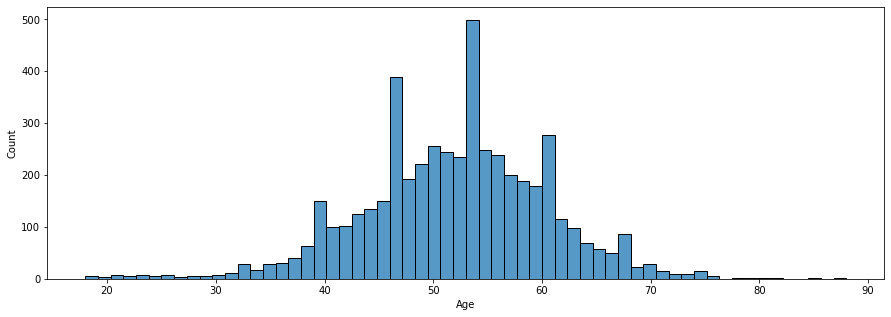

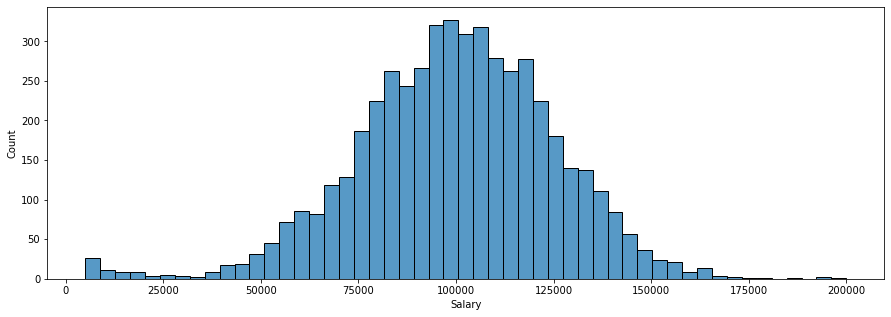

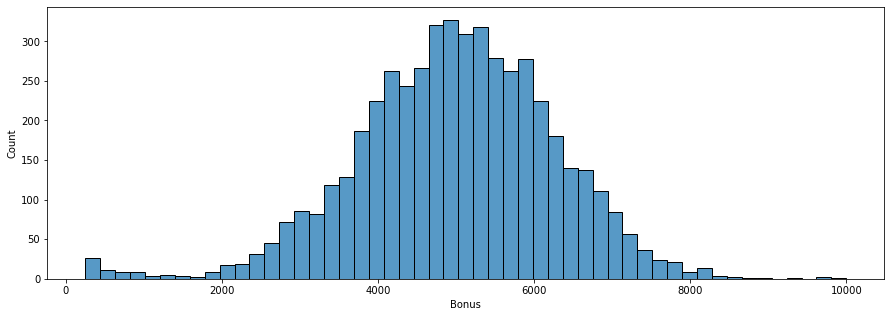

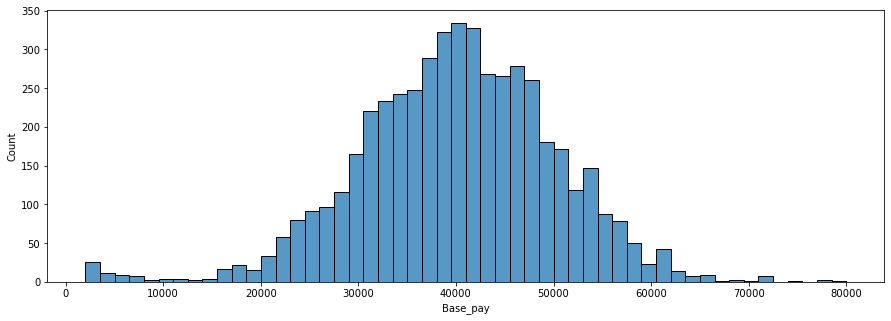

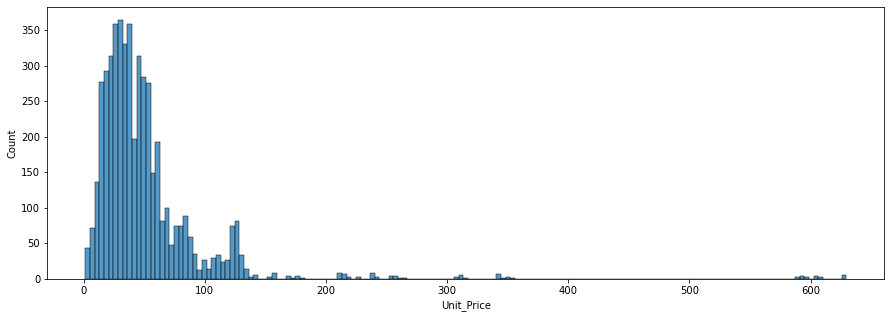

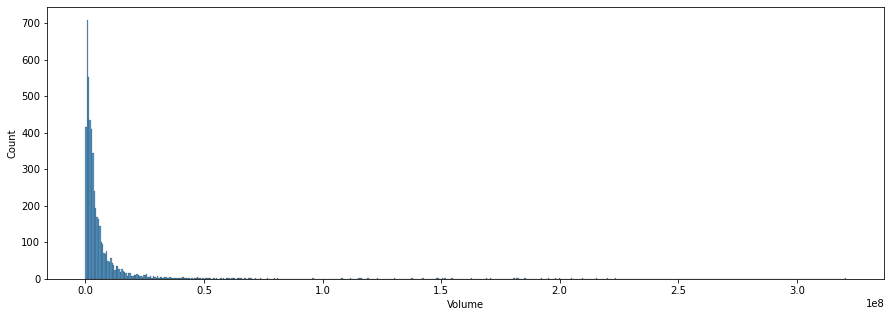

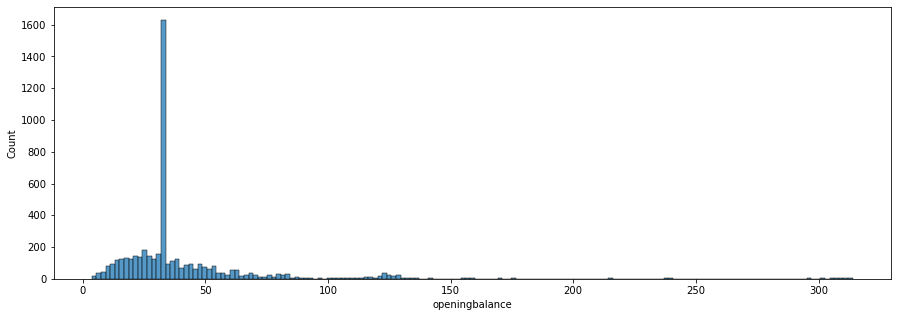

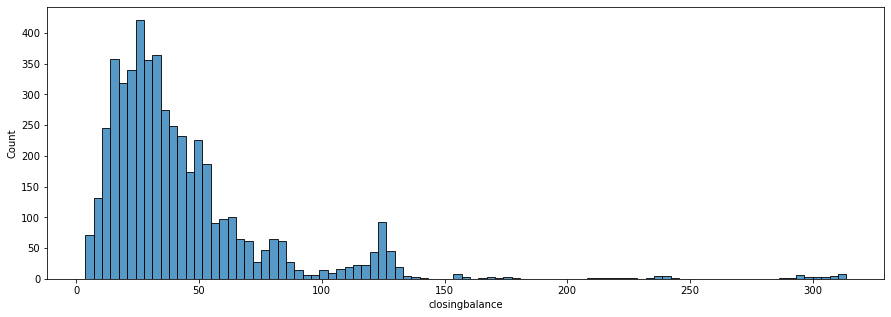

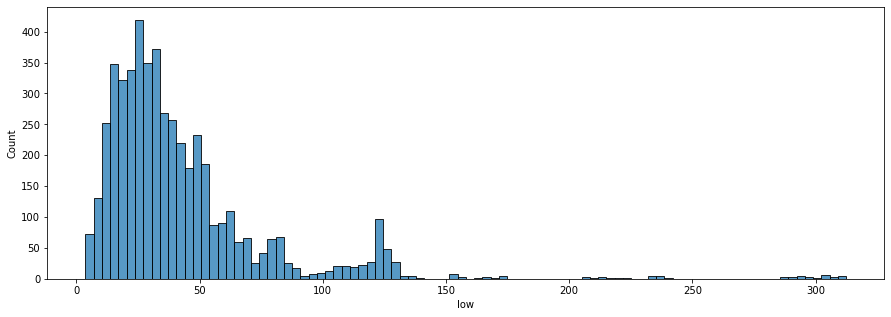

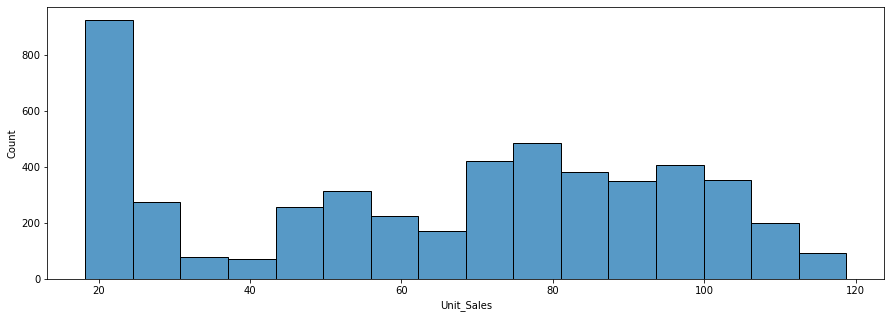

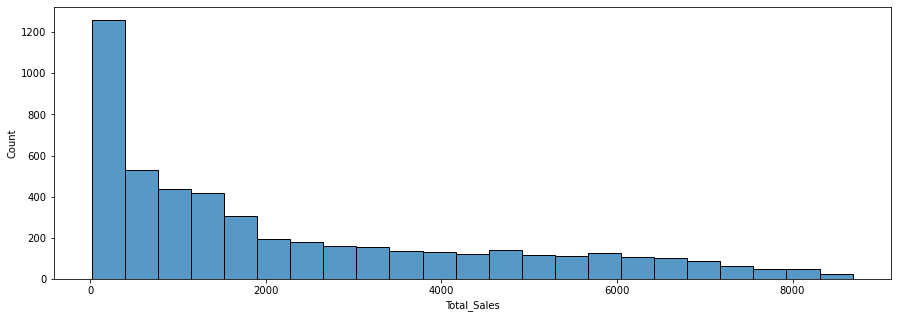

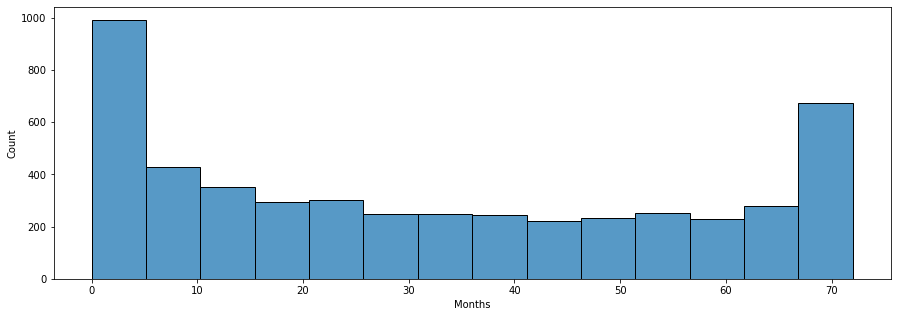

In [24]:
plt.figure(figsize = (15,5))
sns.histplot(df.Age)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Salary)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Bonus)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Base_pay)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Unit_Price)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Volume)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.openingbalance)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.closingbalance)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.low)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Unit_Sales)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Total_Sales)
print()
plt.figure(figsize = (15,5))
sns.histplot(df.Months)
print()

After looking on continous value feature.
*   Age feature => {"min age":18, "max age":88}
*   Salary feature => {"min salary":5089, "max Salary":199970}
*   Bonus feature => {"min Bonus":254, "max Bonus":9998}
*   Base_pay feature => {"min Base_pay":2035, "max Base_pay":79988}
*   Unit_Price feature => {"min Unit_Price":1.44, "max Unit_Price":629.51}
*   Volume feature => {"min Volume":0000, "max Volume":3.208}
*   openingbalance feature => {"min O_balance":3.68, "max O_balance":313.90}
*   closingbalance feature => {"min C_balance":3.68, "max C_balance":313.68}
*   low feature => {"min low":3.65, "max low":312.43}
*   Unit_Sales feature => {"min Unit_Sales":18.25, "max Unit_Sales":118.75}
*   Total_Sales feature => {"min Total_Sales":18.8, "max Total_Sales":120}
*   Months feature => {"min Months":0, "max Months":72}
   



##Gender vs Business 




<AxesSubplot:xlabel='Business', ylabel='count'>

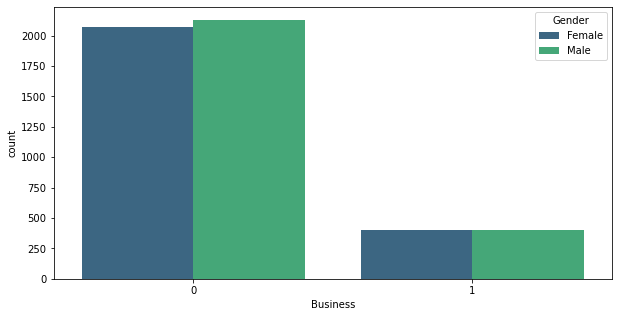

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Business', data=df, hue = 'Gender', palette='viridis')

X-axis contain Business and Y-axis contain Gender feature, from above graph we found that

*   Number of Male&Female Business are equal
*   Number of Female business are little more than Male Business. 

##Business vs Rating

<AxesSubplot:xlabel='Business', ylabel='count'>

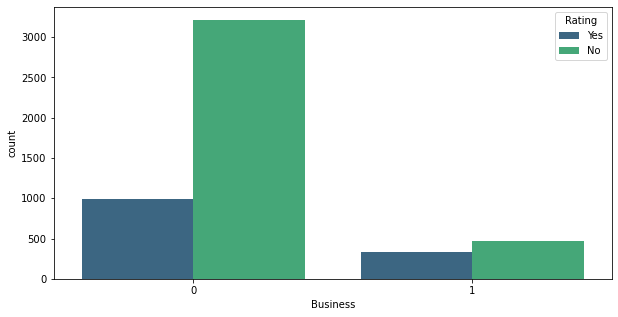

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='Business', data=df, hue = 'Rating', palette='viridis')

X-axis contain Business and Y-axis contain Gender feature, from above graph we found that


*   Business man has given less rating as compared to Non-Business man


##Business vs Calls

<AxesSubplot:xlabel='Business', ylabel='count'>

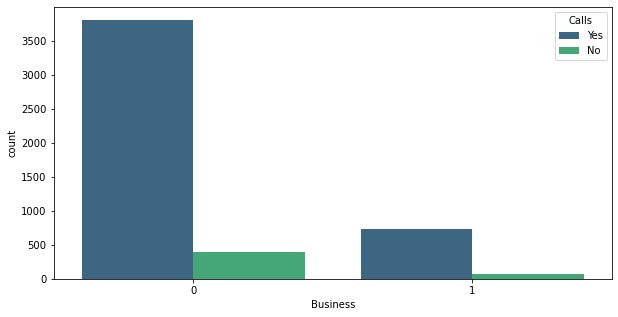

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='Business', data=df, hue = 'Calls', palette='viridis')

X-axis contain Business and Y-axis contain calls feature, from above graph we found that



*   Non Business-man has more authority to make calls as compared to Business-man



##Gender vs Education

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

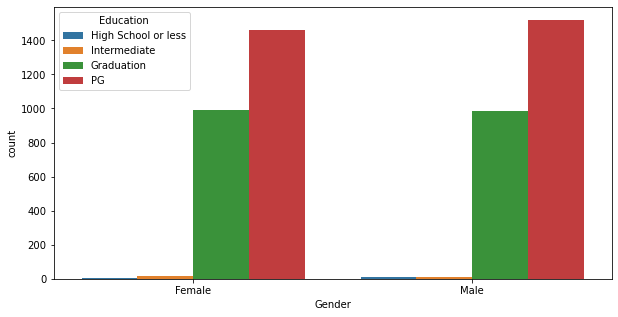

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(df.Gender, hue=df['Education'])

X-axis contain Business and Y-axis contain calls feature, from above graph we found that

*   Approximately Male and Female has same Educational Background




##Business vs Education

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Business', ylabel='count'>

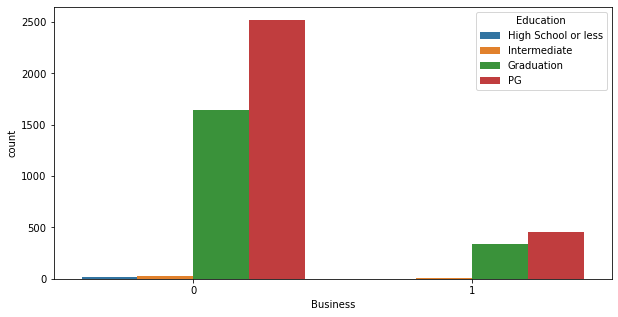

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(df.Business, hue=df['Education'])

X-axis contain Business and Y-axis contain calls feature, from above graph we found that

* Non Business-man have better Educational background than Business-man




##Salary vs Rating and their Education

<Figure size 2160x2160 with 0 Axes>

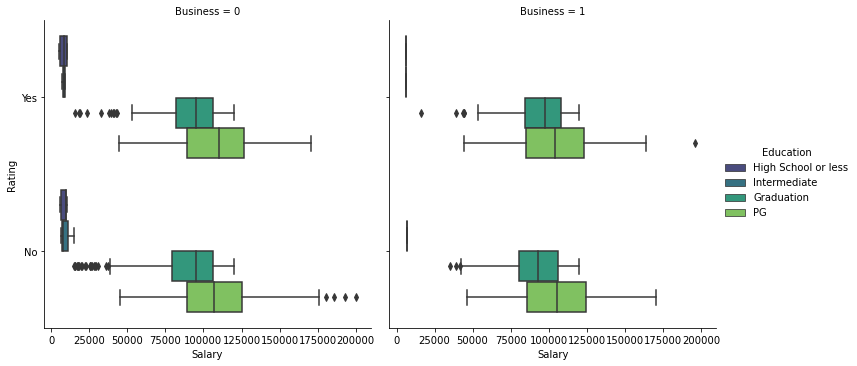

In [30]:
plt.figure(figsize=(30,30))
sns.catplot(kind='box', x='Salary', y='Rating', data=df, palette='viridis',  col='Business', hue='Education')

##Visualization between Gender and Education of Business and Non Business and thier Salary




<Figure size 1080x360 with 0 Axes>

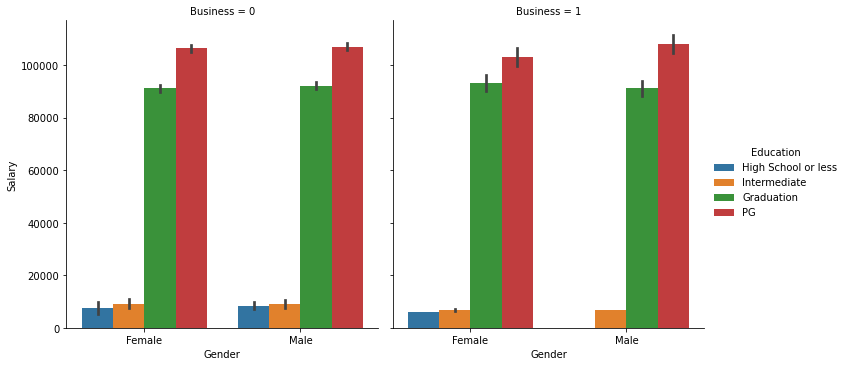

In [31]:
plt.figure(figsize = (15,5))
g = sns.catplot(x="Gender", y="Salary",
                hue="Education", col="Business",
                data=df, kind="bar",
                height=5, aspect=.99);

In this graph we see that 

*   Those male and female are Non-business and high school or intermediate educational backgroud have more Salary than those male and female having same educational background who are Business man.

*  Those male and female are Business and graduation or pg educational backgroud have more Salary than those male and female having same educational background who are Non-business man.



##Visualization between Gender and Business of Total_Sales and their Duration_Type




<Figure size 1080x360 with 0 Axes>

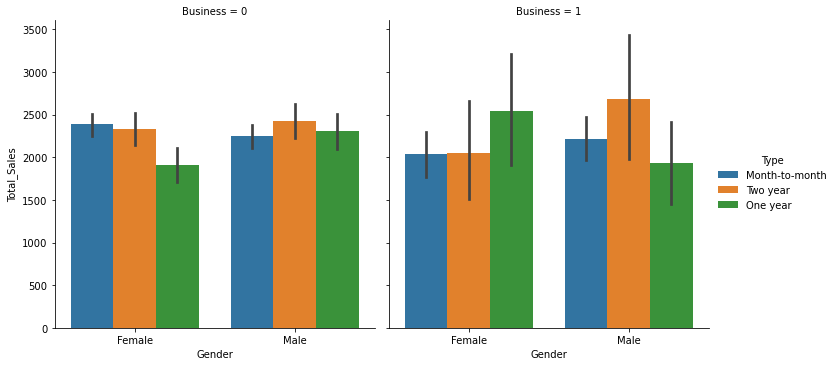

In [32]:
plt.figure(figsize = (15,5))
g = sns.catplot(x="Gender", y="Total_Sales",
                hue="Type", col="Business",
                data=df, kind="bar",
                height=5, aspect=.99);

In this graph we see that


*   In Month-to-Month durantion type, Non-business female has more Total_Sales than Female Business and approximate equals Total_Sales of male Business and Non-Business.
*   IN One Year duration type, Non-business female has less Total_Sales than Female Business and Non-business male has more Total_Sales than Male Business.
*   IN Two Year duration type, Non-business female has more Total_Sales than Female Business and Non-business male has less Total_Sales than Male Business.



##Months vs Rating of Gender




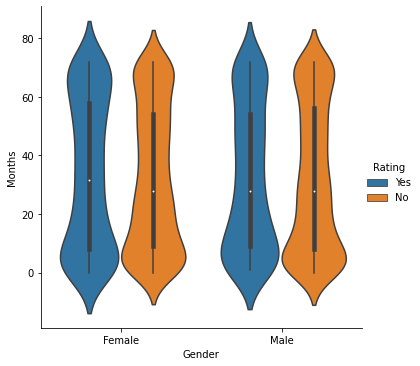

In [33]:
sns.catplot(x = 'Gender', y = 'Months', hue = 'Rating', data = df, kind = 'violin')

In this catplot graph we see that both male and female got apporox equal rating and and not rating by superior

##Gender vs Salary Of Business and Non Business



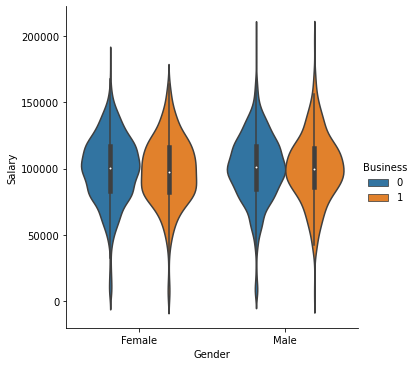

In [34]:
import seaborn as sns
sns.catplot(x = 'Gender', y = 'Salary', hue = 'Business', data = df, kind = 'violin')

In this catplot graph we see that the male Business and Non-Business man has getting more salary than female business and non business.

##HeatMap


Heatmap is a way to show some sort of matrix plot. To use a heatmap the data should be in a matrix form. By matrix we mean that the index name and the column name must match in some way so that the data that we fill inside the cells are relevant.

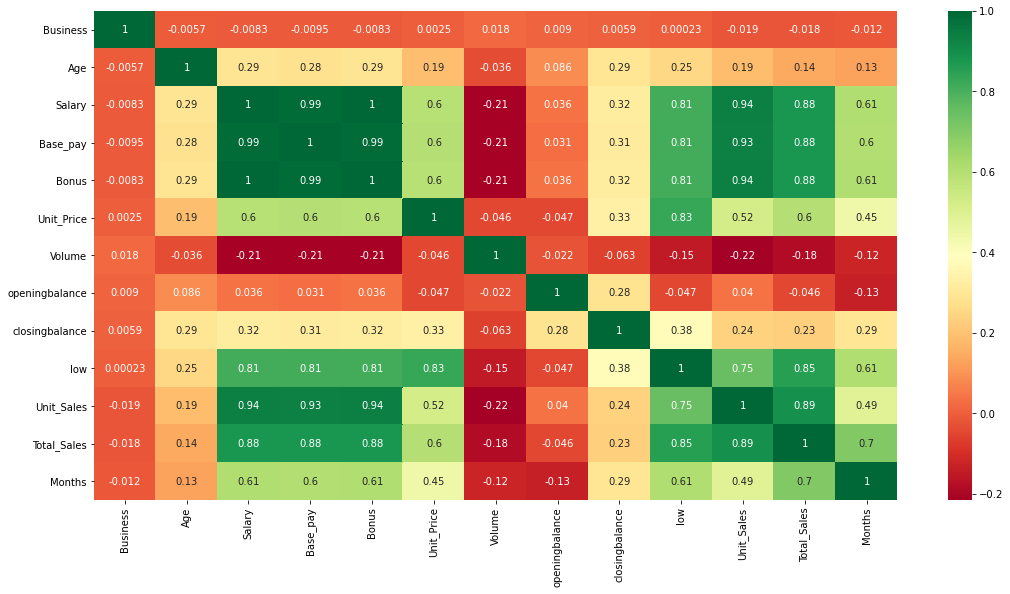

In [35]:
plt.figure(figsize = (18,9))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

#**Feature Engineering**

In [36]:
df.head(1)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.0,2035.6,254.45,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less


##Drop unused columns

In [37]:
df.drop(["Dependancies", "Calls", "Billing", "Type"], axis = 1, inplace = True)

##import labelencoder

In [38]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

##convert Gender column in categorical value
Male : 1 and
Female : 0

In [39]:
df['Gender']= encode.fit_transform(df['Gender'])

##convert Rating column in categorical value
Yes : 1 and No : 0

In [40]:
df['Rating']= encode.fit_transform(df['Rating'])

##convert Education column in categorical value
"High School less" : 1    and "Intermediate" : 2
and "Graduation" : 2   and "PG" :4

In [41]:
df['Education'] = df['Education'].map({'High School or less':1, 'Intermediate':2, 'Graduation':3, 'PG':4})

In [42]:
df.head()

,Gender,Business,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,0,0,1,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,1
1,0,0,1,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,1
2,1,0,0,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,1
3,0,1,1,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,1
4,1,0,1,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,1


##Decleared dependent and independent value 

In [43]:
x = df.drop(['Salary', 'Base_pay', 'Volume', 'low', 'Unit_Sales'] , axis = 1)
y = df['Salary']

In [44]:
x

,Gender,Business,Rating,Age,Bonus,Unit_Price,openingbalance,closingbalance,Total_Sales,Months,Education
0,0,0,1,18,254.4500,3.770000,3.750000,3.760000,18.80,0,1
1,0,0,1,19,284.9060,3.740000,3.850000,3.680000,18.85,0,1
2,1,0,0,22,294.8325,3.890000,4.230000,4.290000,18.90,0,1
3,0,1,1,21,306.2560,4.350000,4.260000,4.310000,19.00,0,1
4,1,0,1,23,312.2500,4.340000,4.790000,4.410000,19.05,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,72,9034.8400,629.511067,33.119999,293.838840,1395.65,72,4
4996,1,0,0,73,9284.2950,627.841071,33.119999,301.311314,1395.65,72,4
4997,1,0,0,74,9631.8400,625.860033,33.119999,306.040009,1395.65,72,4
4998,1,1,1,74,9798.5350,629.510005,33.119999,308.579987,1395.65,72,4


In [45]:
y

0         5089.00
1         5698.12
2         5896.65
3         6125.12
4         6245.00
          ...    
4995    180696.80
4996    185685.90
4997    192636.80
4998    195970.70
4999    199970.74
Name: Salary, Length: 5000, dtype: float64

##Train-Test split

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.25 , random_state = 0)

#**Model Creation**

Here we create differnt machine learning model

##Linear Regression

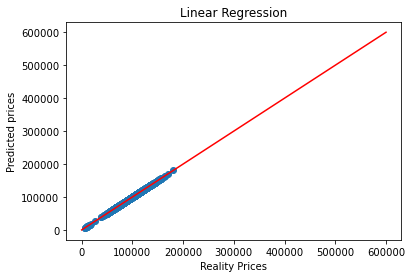

<Figure size 432x288 with 0 Axes>

In [47]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)
plt.scatter(y_test, y_pred_LR)
plt.plot([100000*x for x in range(7)], [100000*x for x in range(7)], color = 'r')
plt.xlabel("Reality Prices")
plt.ylabel("Predicted prices")
plt.title('Linear Regression')
plt.show()
plt.clf()

##Create and fit all ML Model

In [48]:
from numpy.ma.core import shape
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
def model_fit(x_train, x_test, y_train, y_test):
  
  from sklearn.linear_model import LinearRegression
  LR = LinearRegression().fit(x_train, y_train)
  return LR

In [49]:
y_pred = LR.predict(x_test)
y_pred

array([ 64631.43297486, 118137.14109939, 143137.34650162, ...,
        14255.38722703, 107748.98069817,  98171.51063627])

#Mean Squared Error 



*   Mean squared error states that finding the squared difference between actual and predicted value.It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.




In [50]:
MSE = mean_squared_error(y_pred, y_test)
print(MSE)

1.3786608991888966e-11


 After completion of Mean Squared Error comparsion, we found that, LinearRegression has **"1.378**" mean squared error 

#R Squared Score  


R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.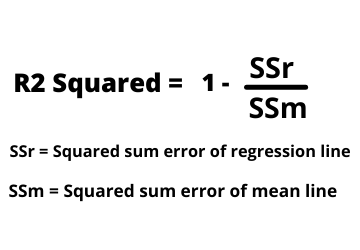

If the R2 score is zero then the above regression line by mean line is equal means 1 so 1-1 is zero. So, in this case, both lines are overlapping means model performance is worst, It is not capable to take advantage of the output column.

Second case is when the R2 score is 1, it means when the division term is zero and it will happen when the regression line does not make any mistake, it is perfect. In the real world, it is not possible.

So we can say that as our regression line moves towards perfection, R2 score move towards one. And the model performance improves.

The normal case is when the R2 score is between zero and one like 0.8 which means your model is capable to explain 80 per cent of the variance of data.

In [51]:
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print(R)

1.0


After comparing R_Square_Scoe of the Linear Regression model, then we conclude that it give 1.0 r2 score.

##**Conclusion**

After doing all the process, we conclude that how machine learning model can be applied in Humar Resource Devision.
we use Linear Regression machine learning algorithm to fit and train the data and we got 1.37 mean_squared_error
and 1.0 r2_score .